## 주성분분석(PCA; Principal Component Analysis) : 차원축소

In [1]:
# - 주성분(주요 구성요성, 특성)분석, PCA라고도 부름
# - 대표적인 차원축소 모델
# - 지도/비지도 모두 사용가능
# - 특성이 많으면 훈련모델의 성능 높지만, 과대적합 될 가능성 큼
#   이때, 차원축소를 이용하면 성능을 유지하면서, 속도 높일 수 있음

### <차원축소>
# - 데이터를 가장 잘 나타내는 일부 특성 선택
# - 데이터 크기(특성)를 줄이면서 학습모델의 성능을 향상시키는 방법
# - 축소된 차원을 다시 원본 차원으로 손실을 최소화하면서 복원이 가능함

### <장점>
# - 대량의 데이터를 이요해 모델 훈련 시
# - 시간이 오래 걸리는 경우 적용해 볼 수 있음
# - 훈련시간 개선 및 성능 유지 또는 향상 가능

## PCA 클래스(모델)

In [2]:
import numpy as np

In [50]:
fruits = np.load('./data/09_fruits_300.npy')
print(fruits.shape)

# 첫번째 축 : 300개 행
# 두번째 축 : 열이 100개
# 세번째 축 : 깊이 100개 (실제 데이터가 들어있는 곳)

# 300행에 10000열로 변환
fruits_2d = fruits.reshape(-1, 100 * 100)
fruits_2d.shape
# 데이터프레임으로
import pandas as pd

df = pd.DataFrame(fruits_2d)
df.info()

(300, 100, 100)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Columns: 10000 entries, 0 to 9999
dtypes: uint8(10000)
memory usage: 2.9 MB


In [16]:
# 사용하는 패키지 : sklearn.decomposition
# 사용하는 클래스(모델) : PCA
from sklearn.decomposition import PCA

# 클래스(모델) 생성하기
# n_components : 주성분의 갯수를 지정(찾을 주성분 갯수)
# 클래스 생성시 최초에 무조건 지정해 주어야 함
pca = PCA(n_components = 50)  # 300개 중에 50개

# 훈련모델 생성
pca.fit(fruits_2d)

PCA(n_components=50)

In [17]:
# 찾은 주성분조회
print(pca.components_.shape)

(50, 10000)


In [19]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1) :
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    
    fig, axs = plt.subplots(rows, cols, figsize =(cols * ratio, rows*ratio),
                           squeeze = False)
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i * 10 +j], cmap='gray_r')
                axs[i, j].axis('off')
                
plt.show()

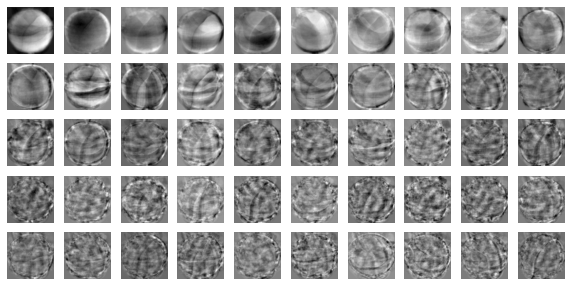

In [20]:
draw_fruits(pca.components_.reshape(-1, 100,100))

In [21]:
print(fruits_2d.shape)

(300, 10000)


### 차원 축소하기

In [22]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


### 원본 데이터 재구성

In [24]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [25]:
# 2d -> 3b로 변환
fruits_reconstruct = fruits_inverse.reshape(-1, 100,100)
print(fruits_reconstruct.shape)

(300, 100, 100)


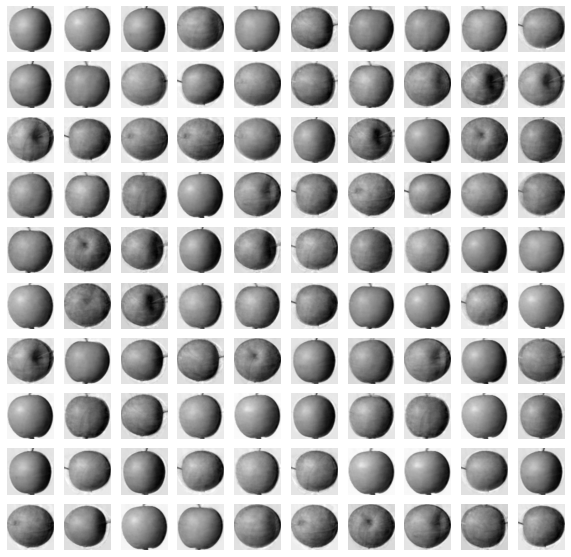

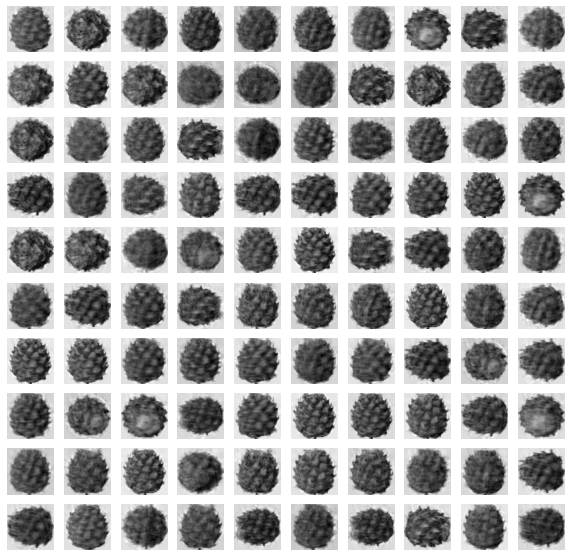

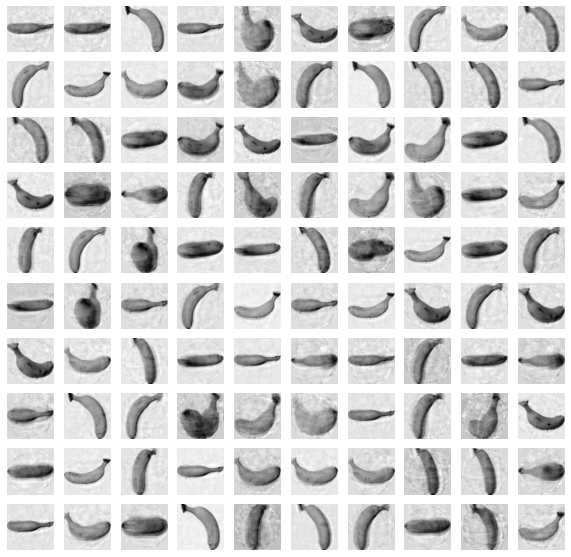

In [26]:
for start in [0, 100, 200] :
    draw_fruits(fruits_reconstruct[start : start + 100])
    print('\n')

## KMeans 모델에 차원축소 데이터 적용하기

In [30]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state = 42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [31]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


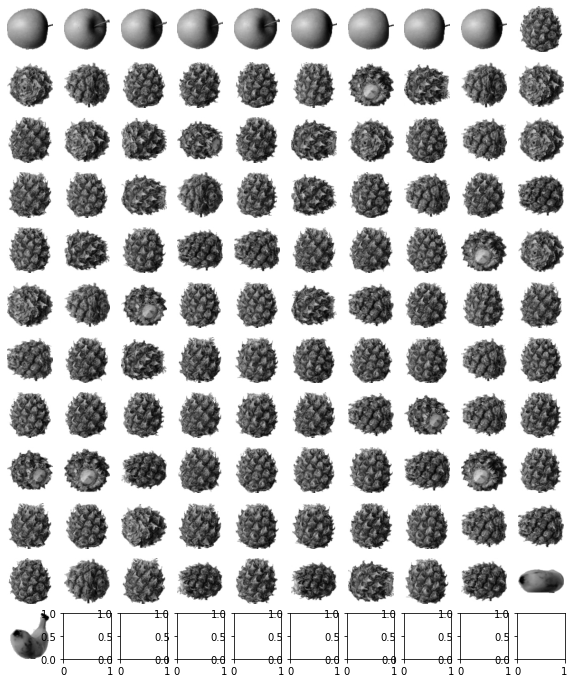

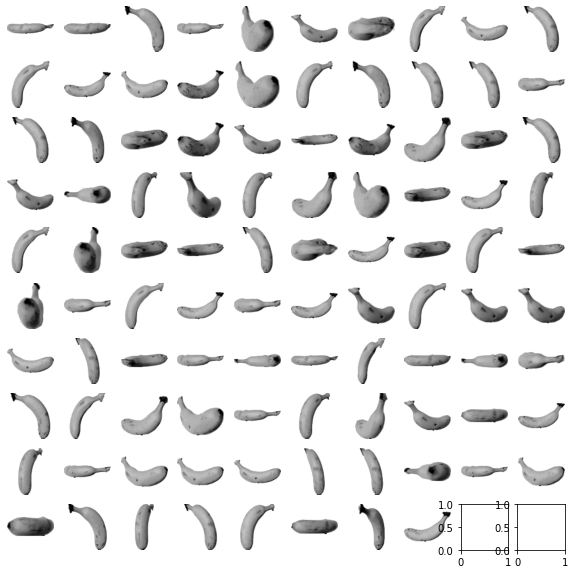

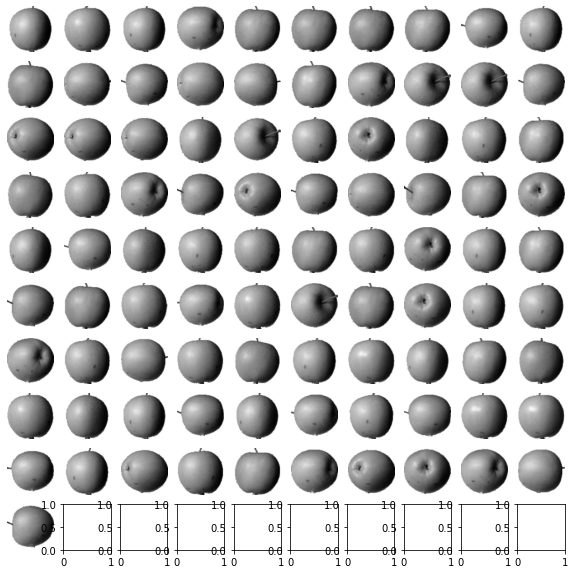

In [32]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

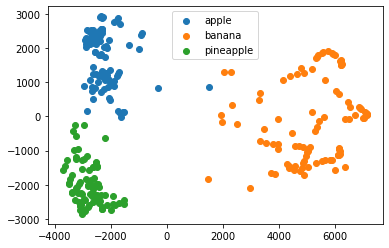

In [34]:
## 클러스터 구성 확인 --> 산점도로 시각화하여 확인
for label in range(0,3):
    data = fruits_pca[km.labels_==label]
    plt.scatter(data[:,0], data[:,1])
    
    plt.legend(["apple", "banana", "pineapple"])
plt.show()

## 로지스틱 회귀모델 적용

In [42]:
from sklearn.linear_model import LogisticRegression

lr  = LogisticRegression()

### 종속변수(target) 생성
# 지도학습을 사용하는 경우 target 변수 필요
target = [0]*100 + [1]*100 + [2]*100

In [45]:
df = pd.DataFrame(fruits_2d)
df['target'] = target
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,target
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
9,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [49]:
### 교차검증으로 성능 최대화
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.4673410415649414


In [51]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [52]:
# 차원축소
print(pca.n_components_)

2


In [53]:
### 차원축소
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [54]:
# 축소된 데이터를 다시 로지스틱에
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_pca, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.03447127342224121


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st